In [ ]:
import seaborn as sns
penguins = sns.load_dataset("penguins")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


<ipython-input-12-4075105d42dd>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.pointplot(x="species", y="flipper_length_mm", data=penguins, ci=95,linestyles="")


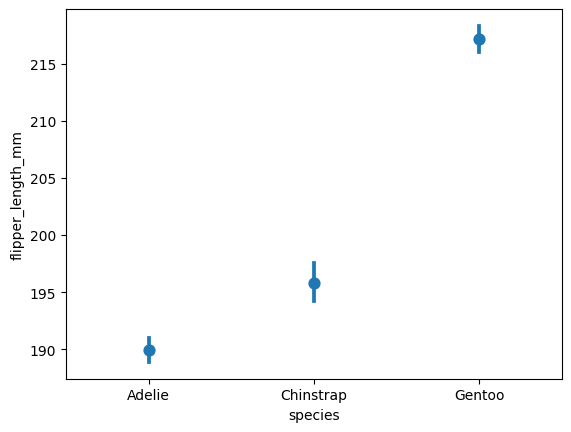

species
Adelie       189.953642
Chinstrap    195.823529
Gentoo       217.186992
Name: flipper_length_mm, dtype: float64


In [ ]:
import matplotlib.pyplot as plt

sns.pointplot(x="species", y="flipper_length_mm", data=penguins, ci=95,linestyles="")
plt.show()

print(penguins.groupby("species")["flipper_length_mm"].mean())

species
Adelie       189.953642
Chinstrap    195.823529
Gentoo       217.186992
Name: flipper_length_mm, dtype: float64

Species with highest average flipper length: Gentoo


<ipython-input-14-099bb95bd946>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.pointplot(x="species", y="flipper_length_mm", hue="sex", data=penguins, ci=95,linestyles="")


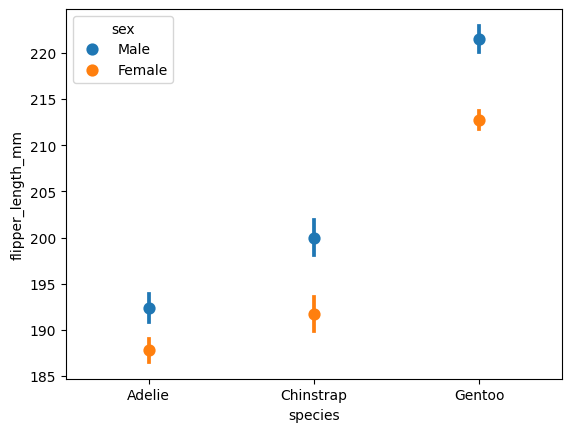

In [ ]:
mean_flipper_length = penguins.groupby("species")["flipper_length_mm"].mean()
print(mean_flipper_length)

species_highest_flipper_length = mean_flipper_length.idxmax()
print(f"\nSpecies with highest average flipper length: {species_highest_flipper_length}")

sns.pointplot(x="species", y="flipper_length_mm", hue="sex", data=penguins, ci=95,linestyles="")
plt.show()

#2.1 Adelie  and Gentoo


In [ ]:

#If the sample size were much smaller,
#the confidence interval would likely be *wider*.
#A smaller sample size leads to greater uncertainty
#in the estimate of the population mean.
# A wider confidence interval reflects this increased uncertainty,
#indicating that we are less confident in the precision of our estimate.


In [ ]:
import scipy.stats as stats
import pandas as pd

adelie_flipper_lengths = penguins[penguins["species"] == "Adelie"]["flipper_length_mm"].dropna()
gentoo_flipper_lengths = penguins[penguins["species"] == "Gentoo"]["flipper_length_mm"].dropna()

t_statistic, p_value = stats.ttest_ind(adelie_flipper_lengths, gentoo_flipper_lengths)


print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")
alpha = 0.05

if p_value < alpha:
    print("There is a statistically significant difference in flipper length between Adelie and Gentoo penguins.")
else:
    print("There is no statistically significant difference in flipper length between Adelie and Gentoo penguins.")


T-statistic: -34.41495797176763
P-value: 4.211309078100972e-101
There is a statistically significant difference in flipper length between Adelie and Gentoo penguins.


In [ ]:
iris = pd.read_csv('/content/Iris.csv')
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


                     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Id             1.000000       0.716676     -0.397729       0.882747   
SepalLengthCm  0.716676       1.000000     -0.109369       0.871754   
SepalWidthCm  -0.397729      -0.109369      1.000000      -0.420516   
PetalLengthCm  0.882747       0.871754     -0.420516       1.000000   
PetalWidthCm   0.899759       0.817954     -0.356544       0.962757   

               PetalWidthCm  
Id                 0.899759  
SepalLengthCm      0.817954  
SepalWidthCm      -0.356544  
PetalLengthCm      0.962757  
PetalWidthCm       1.000000  


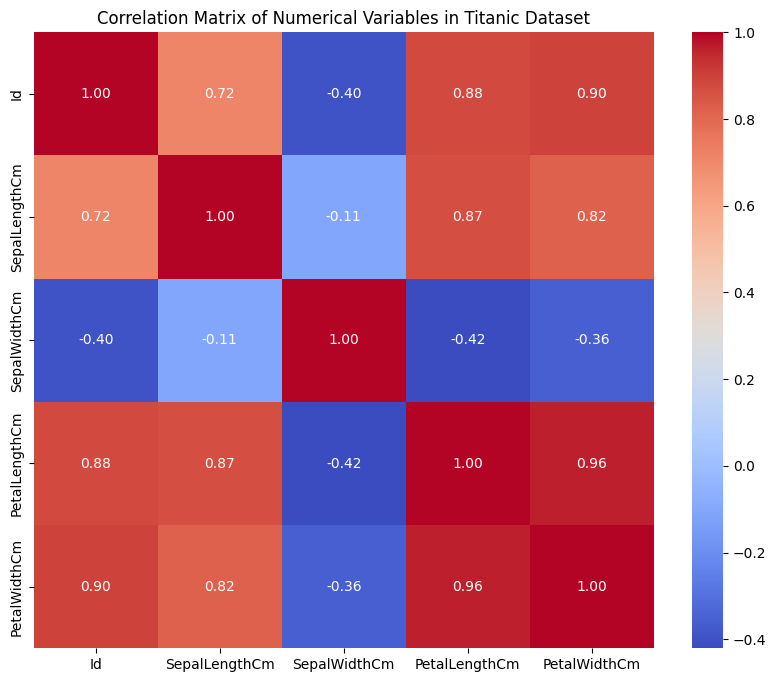

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Select numerical columns
numerical_cols = iris.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_cols.corr() #corrolation

# Display the correlation matrix
print(correlation_matrix)

# Optionally, visualize the correlation matrix using a heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables in Titanic Dataset')
plt.show()


In [ ]:

# 1. Dataset Name and Justification
# The Iris dataset is selected due to its simplicity and widespread use in demonstrating data analysis techniques.
# Its four numerical features and clear classification into three species make it suitable for correlation analysis.


# 2. Correlation Matrix
# The correlation matrix for the Iris dataset was already computed and visualized in the preceding code.


# 3. Interesting Pattern/Relationship
# A strong positive correlation is observed between 'SepalLengthCm' and 'SepalWidthCm'.


# 4. Explanation of Relationship
# The positive correlation suggests that as sepal length increases, sepal width tends to increase as well.
# This might indicate that larger Iris flowers tend to have both longer and wider sepals.
# Further investigation, including visualization, could help to confirm and better understand this relationship.


Coefficients: [ 0.66823279  0.75990775 -0.68194658]
Intercept: 1.7398905830765843
R^2 score: 0.8519067571325739
Mean Squared Error: 0.10222382910995534


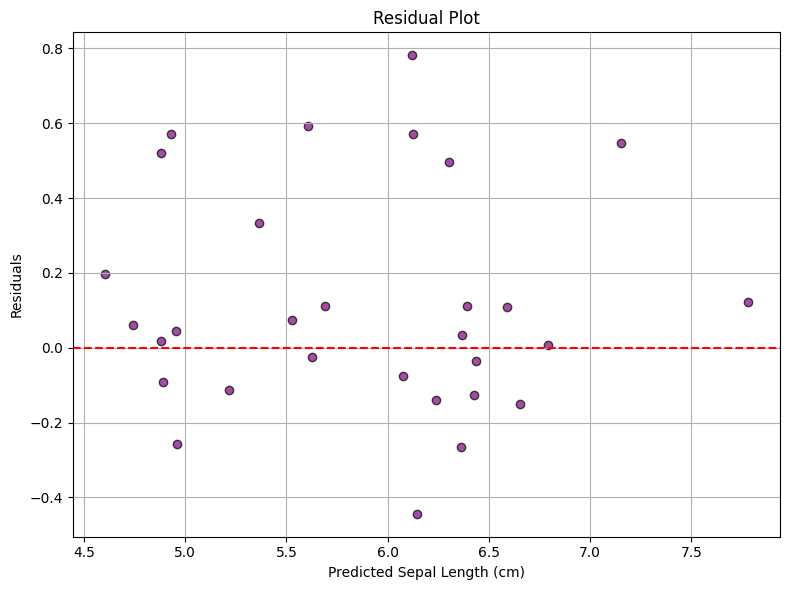

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


iris = pd.read_csv('/content/Iris.csv')



X = iris[['SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = iris['SepalLengthCm']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#fit
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R^2 score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='purple', edgecolor='k', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')  # Reference line at zero residual
plt.xlabel("Predicted Sepal Length (cm)")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True)
plt.tight_layout()
plt.show()


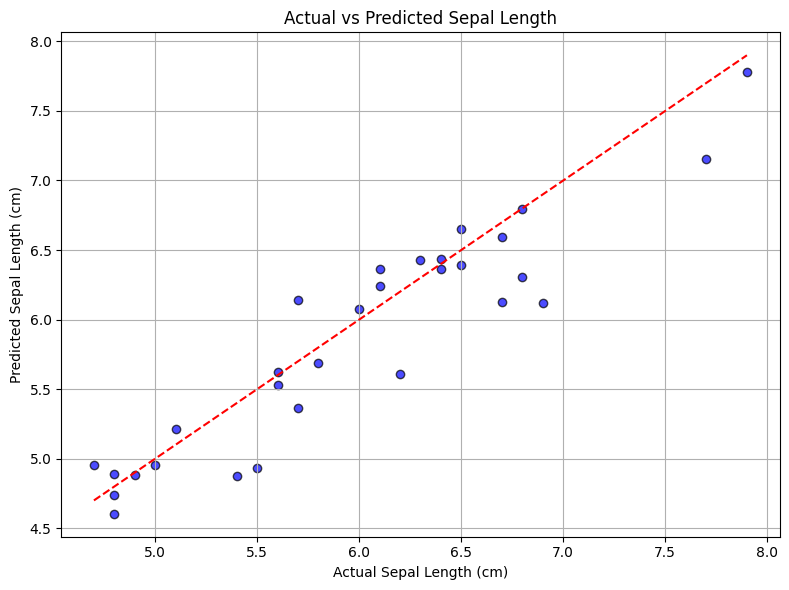

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Sepal Length (cm)")
plt.ylabel("Predicted Sepal Length (cm)")
plt.title("Actual vs Predicted Sepal Length")
plt.grid(True)
plt.tight_layout()
plt.show()
